### <span style="color:#A254FC">Красивые картинки</span> 

Диаграмма направленностей типа: Изотропная


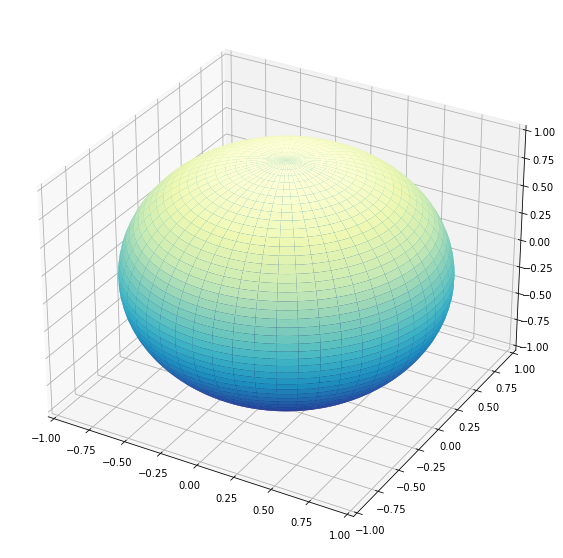

Диаграмма направленностей типа: Диполь


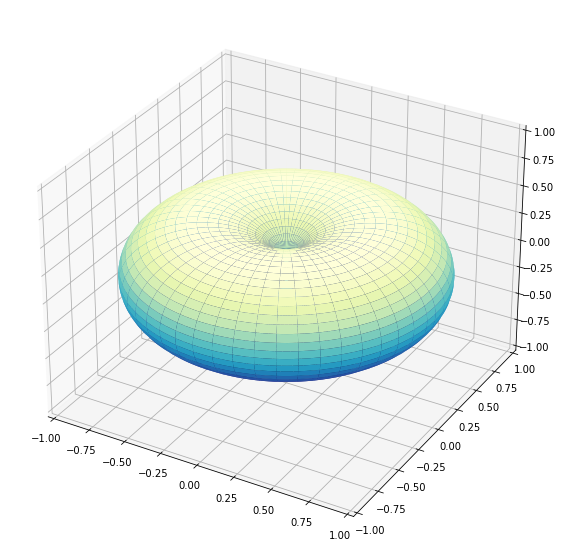

Диаграмма направленностей типа: Двойной диполь


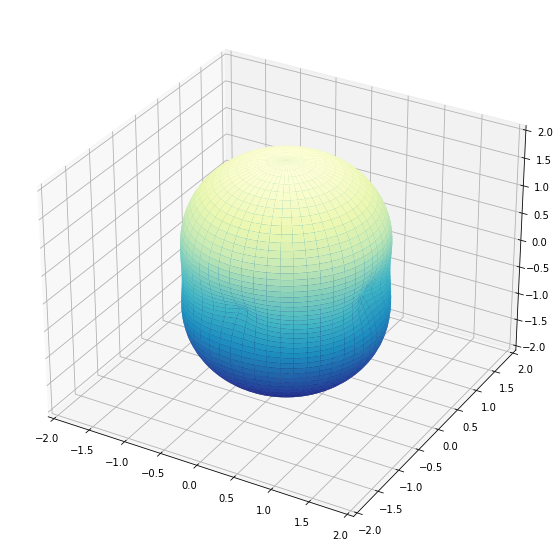

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def pol2dec(r, u, v):
    return np.array([r * np.cos(u) * np.cos(v), r * np.sin(u) * np.cos(v), r * np.sin(v)])

def gain(r: any, model: str = 'dipol') -> float:
    
    def local_dipol(r, ind: str = 'x'):
        cos_a = r[0]*int(ind=='x') + r[1]*int(ind=='y') + r[2]*int(ind=='z')
        sin_a = np.sqrt(r[1]**2 + r[2]**2)*int(ind=='x') + \
                np.sqrt(r[0]**2 + r[2]**2)*int(ind=='y') + \
                np.sqrt(r[0]**2 + r[1]**2)*int(ind=='z')
        return np.cos(cos_a * np.pi / 2) / sin_a
    
    if model == 'dipol':
        return local_dipol(r, 'z')
    if model == 'double dipol':
        return local_dipol(r, 'x') + local_dipol(r, 'y')
    return 1

def plot_model_gain(model: str, txt: str, N: int = 200):
    print(f"Диаграмма направленностей типа: {txt}")
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')

    u = np.linspace(0, 2 * np.pi, N)
    v = np.linspace(-np.pi / 2, np.pi / 2, N)
    U, V = np.meshgrid(u, v)
    
    g = np.array([[gain(r=pol2dec(1, u[i], v[j]), model=model) for i in range(N)] for j in range(N)])
    max_g = np.max(g.flatten())
    X, Y, Z = g*np.cos(U)*np.cos(V), g*np.sin(U)*np.cos(V), g*np.sin(V)

    ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)
    ax.set_xlim(-max_g, max_g)
    ax.set_ylim(-max_g, max_g)
    ax.set_zlim(-max_g, max_g)
    # ax.view_init(320, 70)
    plt.show()

plot_model_gain('equal', 'Изотропная')
plot_model_gain('dipol', 'Диполь')
plot_model_gain('double dipol', 'Двойной диполь')